# Reading DFlowFM Map Output

Demonstrate basic loading and plotting of map output from DFlowFM. This 
example uses sample output which is not part of the stompy
example data.

In [18]:
import matplotlib.pyplot as plt
import xarray as xr
from stompy.model.delft import dfm_grid
from stompy.grid import unstructured_grid
%matplotlib notebook

# Open the NetCDF Map file

In [19]:
map_nc='/home/emma/test_run/r14_map.nc'

# This pulls the grid topology/geometry out of the netcdf.
# The netcdf files aren't quite ugrid compliant, so we have
# to use DFMGrid, specific to Flow FM's version of netcdf
grid=dfm_grid.DFMGrid(map_nc)

# The xarray dataset is used to access the variables which
# will be plotted on the grid
ds=xr.open_dataset(map_nc)

<IPython.core.display.Javascript object>


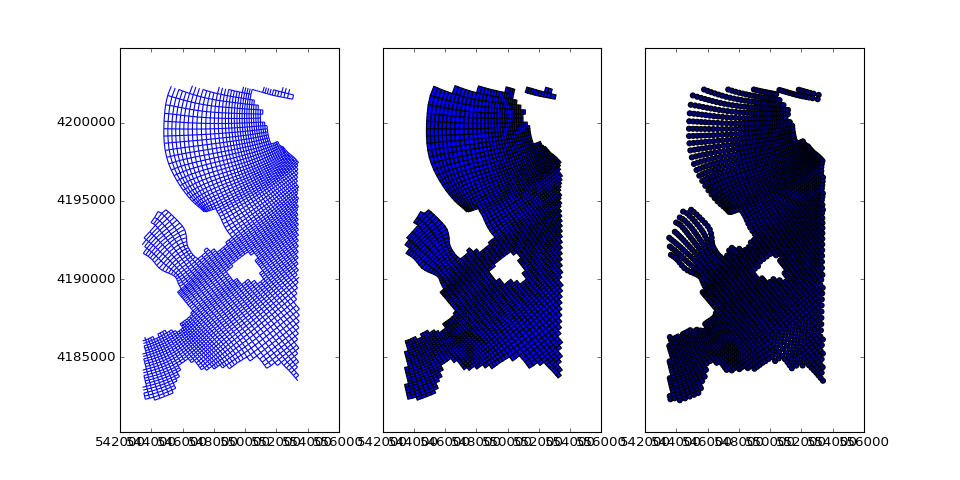

In [23]:
fig,axs=plt.subplots(1,3,sharex=True,sharey=True,figsize=(12,6))

# To make it a bit faster, supply a clipping box:
clip=(543535., 553384.,4176205., 4202129.)

grid.plot_edges(ax=axs[0],clip=clip)
grid.plot_cells(ax=axs[1],clip=clip)
grid.plot_nodes(ax=axs[2],clip=clip)


<IPython.core.display.Javascript object>


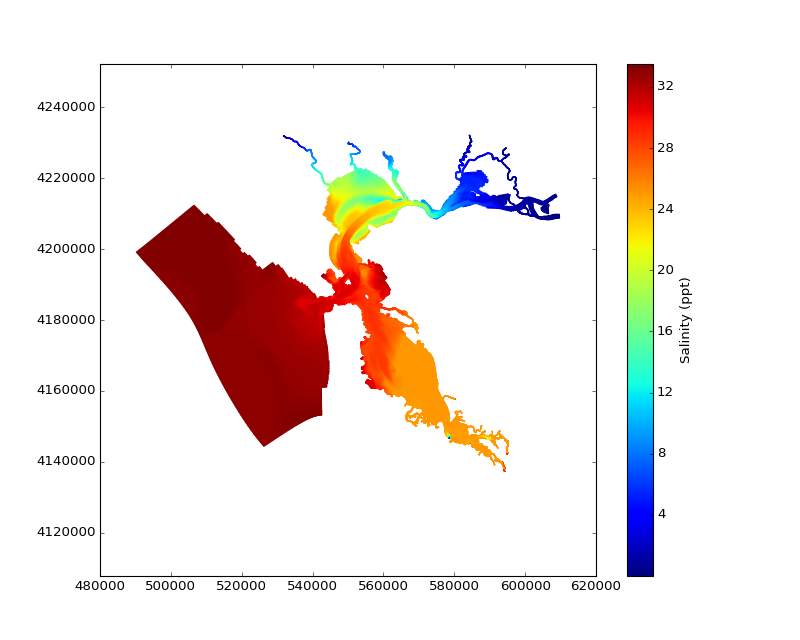

In [22]:
# Select the second timestep, top layer of output.
# .values returns a numpy array, dropping the XArray wrapping
surf_salt=ds.sa1.isel(time=1,laydim=0).values

fig,ax=plt.subplots(figsize=(10,8))
# plot_* commands typically return a collection
coll=grid.plot_cells(values=surf_salt)
# Doctor up the presentation a bit:
coll.set_edgecolor('face')
plt.colorbar(coll,label='Salinity (ppt)')